In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# dataset3.info()
dataset3_path = r"C:\Users\huyen\Documents\Final_DoAn\Final_Data\dataset3.csv"
data= pd.read_csv(dataset3_path)
# dataset3= data.dropna()
# dataset3 = dataset3.reset_index(drop=True)
# dataset3.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    8789 non-null   object 
 1   comment    8787 non-null   object 
 2   id_res     8789 non-null   int64  
 3   id_user    8789 non-null   object 
 4   latitude   8789 non-null   float64
 5   longitude  8789 non-null   float64
 6   name_res   8789 non-null   object 
 7   rating     8789 non-null   float64
 8   username   8789 non-null   object 
 9   label      8789 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 686.8+ KB


In [3]:
from pyvi import ViTokenizer
from string import punctuation

In [4]:
#xay dung bo stop word
stop_word = []
with open("stop_words.txt", encoding= "utf-8") as f:
    t = f.read() 
    for word in t.split(): 
        stop_word.append(word)
    f.close()
punc = list(punctuation) 
stop_word = stop_word + punc 

In [5]:
def pre_processing(sentence):
    word_tokens = ViTokenizer.tokenize(sentence)
    filtered_sentence = [w for w in word_tokens.split(" ") if not w in stop_word]
    result = ''
    for word in filtered_sentence:
        result = result + ' ' + word
    return result.strip()

In [6]:
data["comment"]= data["comment"].apply(lambda x: pre_processing(str(x)))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# vectorizer = CountVectorizer()
tf = TfidfVectorizer(min_df=5,max_df=0.8,max_features=10000,ngram_range=(1, 2),sublinear_tf=True)
# X_bow = vectorizer.fit_transform(data['Review'])
X_tfidf = tf.fit_transform(data['comment'])
y = data['label']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size= 0.2)

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
lr.score(X_test, y_test)
y_pred = lr.predict(X_test)

In [15]:
lr.score(X_test, y_test)

0.9562002275312855

In [16]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       749
           1       0.97      0.95      0.96      1009

    accuracy                           0.96      1758
   macro avg       0.95      0.96      0.96      1758
weighted avg       0.96      0.96      0.96      1758



Confusion matrix, without normalization


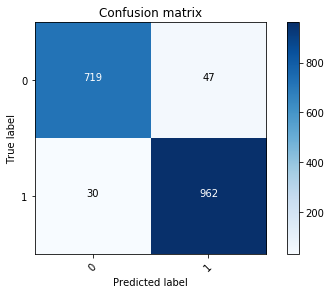

In [17]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=['0', '1'])

Normalized confusion matrix
[[0.94 0.06]
 [0.03 0.97]]


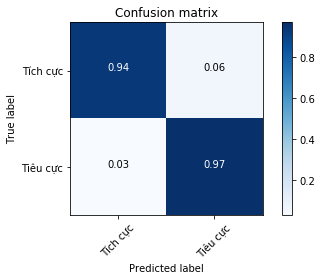

In [18]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Tích cực", "Tiêu cực"],normalize=True,
                      title='Confusion matrix')
plt.show()

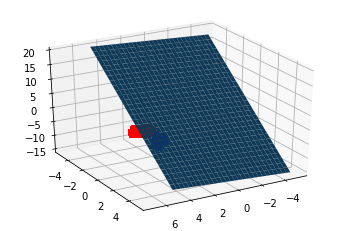

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # chúng ta chỉ lấy 3 đăng trưng
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
# model = svm.SVC(kernel='linear')
# clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()